# Regression problems - Example

In this script we demonstrate how a Machine Learning workflow can look like when you use cross validation on the train set to choose model and then evaluate the chosen models generalization error on the test set. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Loading Data

In [3]:
# This code is merely executed to see the description of the data in a smooth way
data = load_diabetes()

In [ ]:
print(data.DESCR)

## Storing/Loading the data in the way it will be used

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## EDA

In [ ]:
# Placing all the data in "df" so I can make a nice correlation plot
df = X.copy()
df['target'] = y
df

In [ ]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# Intuitive (and from the correlation plot), therese should be a positive relationship 
# between the target (disease progression) and BMI.
plt.scatter(df["bmi"], df["target"])
plt.xlabel("bmi")
plt.ylabel("Disease Progression")

In [ ]:
X_train.head()

In [ ]:
X_train.describe()

In [ ]:
y_train.head()

In [ ]:
y_train.describe()

## Creating 3 different models and choosing the best one with Cross Validation.

We'll be creating and evaluating 3 regression models: a `LinearRegression`, a `Lasso`, and a `RandomForestRegressor`. 

### `LinearRegression`

In [16]:
lin_reg = LinearRegression()

# In Scikit-learn, higher score is better. Since a low MSE is better than a high,
# we use negative mean squared error to respect the rule "higher is better".
scores_lr = cross_val_score(lin_reg, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('RMSE for each iteration:', -scores_lr)
print('RMSE:', np.mean(-scores_lr))

RMSE for each iteration: [53.31283683 53.16309571 59.79731897]
RMSE: 55.42441716921892


### `Lasso`

In [14]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)


{'alpha': 0.01}
RMSE for each iteration: [53.64040125 53.57666852 59.49674471]
RMSE: 55.571271493867776


### `RandomForestRegressor`

In [17]:

scores_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('RMSE for each iteration:', -scores_lasso)
print('RMSE:', np.mean(-scores_lasso))

RMSE for each iteration: [53.64040125 53.57666852 59.49674471]
RMSE: 55.571271493867776


In [18]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
forest_reg.fit(X_train, y_train)

print(forest_reg.best_params_)

scores_forest = cross_val_score(forest_reg, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
print('RMSE for each iteration:', -scores_forest)
print('RMSE:', np.mean(-scores_forest))

{'max_depth': None, 'n_estimators': 100}
RMSE for each iteration: [56.72935613 62.10853886 58.63596699]
RMSE: 59.15795399193265


The Linear Regression modell had lowest RMSE and hence we choose that one as our model. 

In [6]:
lin_reg.fit(X_train, y_train)

LinearRegression()

## Evaluating the chosen model on the test set

In [7]:
# Calculating the mean value of the y_test data. We will put this in relation to the RMSE that we soon calculate.
print(np.mean(y_test))

145.77528089887642


<Axes: >

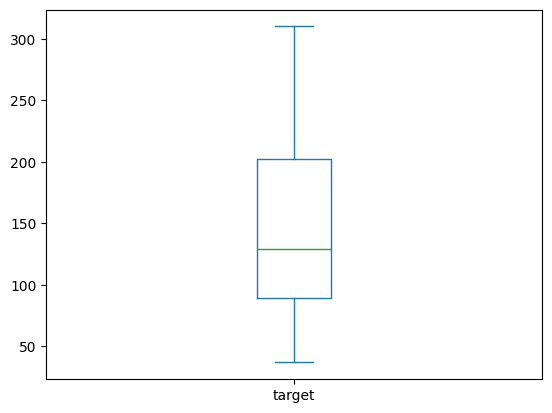

In [8]:
y_test.plot.box()

In [9]:
y_test_pred_lr = lin_reg.predict(X_test)


In [12]:
y_test

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64

In [10]:
y_test_pred_lr

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [11]:
RMSE_test_data = root_mean_squared_error(y_test, y_test_pred_lr)
RMSE_test_data

53.85344583676593

In [13]:
# Our error on the test data is about 37% in relation to the mean value of the test data. 
(RMSE_test_data)/(np.mean(y_test))

np.float64(0.3694278310060249)